In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [28]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)
x_test = pd.read_csv('/content/drive/MyDrive/test.csv').values

In [14]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val.shape)
print("x_test:", x_test.shape)

x_train: (33600, 784)
y_train: (33600,)
x_val: (8400, 784)
y_val: (8400,)
x_test: (28000, 784)


1. Image 샘플 시각화

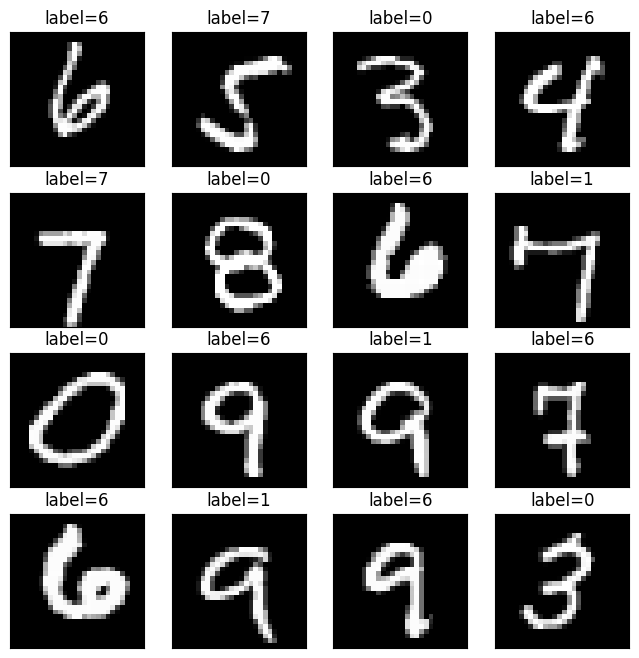

In [44]:
fig, ax=plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
  for j in range(4):
    ax[i, j].imshow(x_train[i*4+j].reshape(28, 28), cmap='gray')
    ax[i, j].set_title('label=%s'%(y_train[i*4 + j*4]))
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

2. Scikit-learn 을 이용해서 모델을 학습

In [19]:
clf=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                       intercept_scaling=1, l1_ratio=None, max_iter=100,
                       multi_class='multinomial', n_jobs=None, penalty = 'l2',
                       random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                       warm_start=False)
clf.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', tol=0.001)

3. 검증(Validation)데이터(x_val)를 prediction 하고 정확도를 평가

In [27]:
from sklearn.metrics import accuracy_score
y_val_pred = clf.predict(x_val)
print("Model accuracy is %0.3f" % (accuracy_score(y_val, y_val_pred)))

Model accuracy is 0.918


4. 옳게 분류한 이미지를 아래 format 에 맞게 시각화


Correctly predicted images:


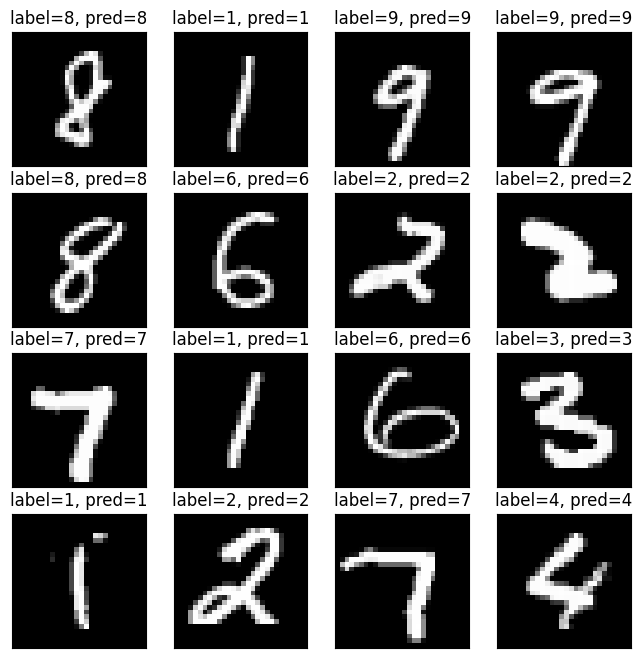

In [51]:
print("Correctly predicted images:")
x_val_correct = x_val[y_val == y_val_pred,:]
y_val_correct = y_val[y_val == y_val_pred]
y_val_pred_correct = y_val_pred[y_val == y_val_pred]
fig, ax = plt.subplots(4, 4, figsize=(8, 8))

for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        ax[i, j].imshow(x_val_correct[idx].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('label=%d, pred=%d' % (y_val_correct[idx], y_val_pred_correct[idx]))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

5. 잘못 분류한 이미지를 아래 format 에 맞게 시각화

Incorrectly predicted images:


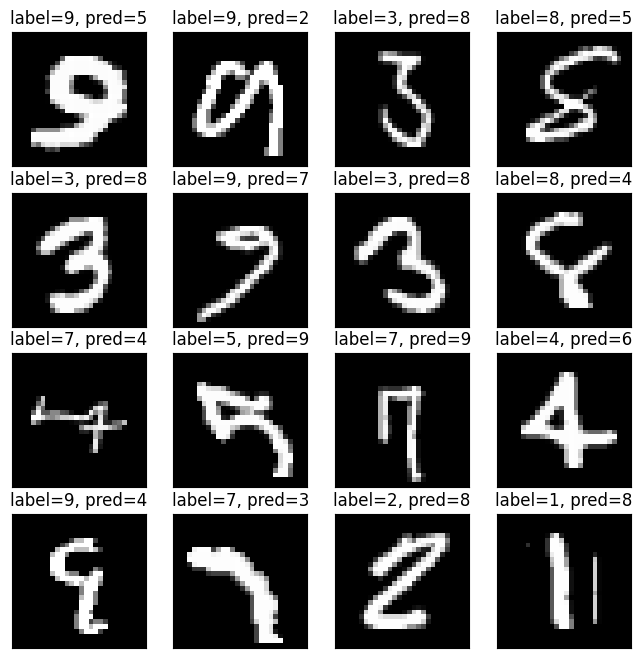

In [52]:
print("Incorrectly predicted images:")
x_val_incorrect=x_val[y_val!=y_val_pred,:]
y_val_incorrect=y_val[y_val!=y_val_pred]
y_val_pred_incorrect=y_val_pred[y_val!=y_val_pred]
fig, ax = plt.subplots(4, 4, figsize=(8, 8))

for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        ax[i, j].imshow(x_val_incorrect[idx].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('label=%d, pred=%d' % (y_val_incorrect[idx], y_val_pred_incorrect[idx]))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

6. 테스트 데이터(x_test)를 사용해서 예측하기

In [55]:
preds=clf.predict(x_test)
sample_submission = pd.DataFrame({'ImageId': range(1, len(preds) + 1),'Label': preds})

7. 예측값을 파일(sample_submission.csv)로 내보내기

In [59]:
sample_submission['Label']=preds
sample_submission.to_csv('/content/drive/MyDrive/sample_submission1.csv', index=False)
print("submission1.csv 파일 저장 완료!")

submission1.csv 파일 저장 완료!
